#**EECS 3401 Final Project: Netflix Movies and TV Shows**

## Authors: Ryan Luk, Samin Sharif, Heet Narechania

**Original Dataset Source: BANSAL, SHIVAM. (2021). Netflix Movies and TV Shows. https://www.kaggle.com/datasets/shivamb/netflix-shows/data**


**Modified Dataset: Student Performance https://raw.githubusercontent.com/heetnarechania/EECS-3401-Netflix/main/netflix_titles.csv?token=GHSAT0AAAAAACKF44GSKYULIQQL2PSWZOIEZKVWFVA**

# Netflix Dataset Description

**Attributes for netflix_titles.csv dataset:**

1. show_id - Identifier for the show.

2. type - Type of content (binary: "Movie" or "TV Show").

3. title - Title of the content.

4. director - Director of the content.

5. cast - Cast of the content.

6. country - Country of origin.

7. date_added - Date when the content was added (Format: Date, e.g., "September 25, 2021").

8. release_year - Release year of the content (Format: Numeric).

9. rating - Content rating (Format: String, e.g., "PG-13", "TV-MA", "PG", "TV-14", "TV-PG").

10. duration - Duration of the content (Format: String, e.g., "90 min", "2 Seasons", "104 min").

11. listed_in - Genre categories of the content (Format: String, e.g., "Documentaries", "International TV Shows, TV Dramas, TV Mysteries").

12. description - Brief description of the content (Format: String).

# 1- Look at the big picture and frame the problem.

### Frame the problem
Understand and gain insights from the movies and TV shows data on the Netflix platform.<br>
Key Questions:
- What is the distribution of movies vs. TV shows on Netflix?
- What are the common genres available?
- How does the release year impact the availability of content?
- Are there notable trends over the years?
- Can we identify any patterns in viewer ratings?

### Look at the big picture
In our project, we have prepared the netflix data for EDA, data modeling, conducted training, and evaluated various machine learning models. The analysis has yielded valuable insights into the content offered by Netflix, allowing us to make predictions about the type of content the platform is likely to produce as time progresses.

## Key Analyses

### Content Distribution
We explored the distribution of movies versus TV shows on Netflix to gain a comprehensive understanding of the platform's content landscape.

### Common Genres
Identification and visualization of common genres on Netflix were performed, shedding light on the popularity of each genre.

### Release Year Impact
An analysis of how the release year influences content availability was conducted, revealing notable trends over the years.

### Average Duration
The average duration of movies and TV shows was investigated to discern viewer preferences.

### Viewer Ratings
Delving into viewer ratings, we explored patterns and relationships with other variables.

In [138]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Load the dataset

Open the dataset using Pandas and load it into a DataFrame, which is the object Pandas uses to store tables of data.<br>
Pandas uses two objects for storing datasets: the DataFrame and the Series.<br>
Series is used for datasets with only one column, and DataFrame is used for datasets of more than one column.

In [139]:
netflix_data = pd.read_csv("netflix_titles.csv") # Read dataset from the CSV file into a DataFrame

In [140]:
netflix_data.head() # Use head() to look at the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [141]:
netflix_data.describe() # Use describe() method to see a summary of the numerical attributes

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [142]:
netflix_data.info() # Use info() to get a quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [143]:
netflix_data.shape #Determine the shape of the dataset

(8807, 12)

## 2.1-Cleaning the data

In [144]:
netflix_data.isnull().sum() #Check for missing values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [145]:
#Drop the missing rows
netflix_data.dropna( subset=['rating', 'duration','date_added'], inplace=True)

In [146]:
# replace all null values with a string value of 'N/A' if categorical and gave it the value of the most used numerical value (mean) if it is a number ()
netflix_data["director"] = netflix_data["director"].fillna("N/A")
netflix_data["cast"] = netflix_data["cast"].fillna("N/A")
netflix_data["country"] = netflix_data["country"].fillna("N/A")

In [147]:
netflix_data.isnull().sum() # check if the values have been properly replaced

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [148]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [149]:
# Since date_added column is of object data type , thus converting it to datetime format
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'], format='%B %d, %Y', errors='coerce')

# Extract month, year, and month name
netflix_data['month_added'] = netflix_data['date_added'].dt.month
netflix_data['year_added'] = netflix_data['date_added'].dt.year
netflix_data['month_name'] = netflix_data['date_added'].dt.month_name()

# Fill missing values
netflix_data["date_added"].fillna(netflix_data["date_added"].mode()[0], inplace=True)
netflix_data['month_added'].fillna(netflix_data['month_added'].mode()[0], inplace=True)
netflix_data['year_added'].fillna(netflix_data['year_added'].mode()[0], inplace=True)
netflix_data['month_name'].fillna("N/A", inplace=True)

# Confirm the changes
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  month_added   8790 non-null   float64       
 13  year_added    8790 non-null   float64       
 14  month_name    8790 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1),

In [150]:
# Kids: Content suitable for children of all ages.
# Older Kids: Intended for older children, typically those above 7 years old.
# Teens: Geared towards teenagers, usually 13 years and older.
# Adults: Content intended for adults, 18 years and older.

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
}

# Replace Rating values with age targets, they are based on
netflix_data.loc[:, 'ages'] = netflix_data['rating'].replace(ratings_ages)
# Filter out rows with non-standard values in the 'ages' column
netflix_data = netflix_data[~netflix_data['ages'].isin(['74 min', '84 min', '66 min'])]
# Check the unique values in the 'ages' column
print(netflix_data['ages'].unique())

['Teens' 'Adults' 'Older Kids' 'Kids']


In [151]:
netflix_data.head() #Check all the new columns added

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,month_name,ages
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,N/A,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0,September,Teens
1,s2,TV Show,Blood & Water,N/A,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,2021.0,September,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",N/A,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,2021.0,September,Adults
3,s4,TV Show,Jailbirds New Orleans,N/A,N/A,N/A,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9.0,2021.0,September,Adults
4,s5,TV Show,Kota Factory,N/A,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,2021.0,September,Adults


# 3. Explore and visualize the data to gain insights.


### 3.1 Distribution of Movies and TV Shows on Netflix

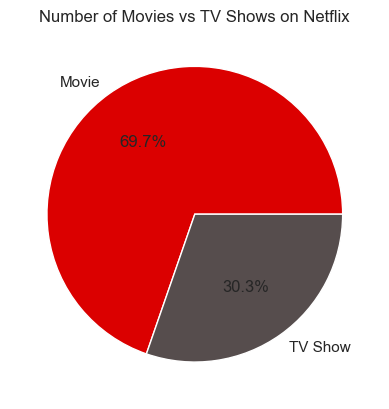

In [152]:
# Calculate movie type counts
movie_type_counts = netflix_data["type"].value_counts()

# Create a simple pie chart
plt.pie(
    movie_type_counts,
    labels=movie_type_counts.index,
    autopct="%1.1f%%",
    colors=["#db0000", "#564d4d"]
)

# Set the title
plt.title("Number of Movies vs TV Shows on Netflix")

# Display the pie chart
plt.show()

This graph provides an overview of the current content distribution on Netflix, revealing that movies make up approximately 70% of content. This dominance of movies in the present signifies their prevalence on Netflix.<br>
However that is not to say that this observation implies a preference for movies over TV shows in the broader context. The next section will explore content trends across different time periods to further clarify this.

### 3.2 Release Year of Content Avaliable on Netflix

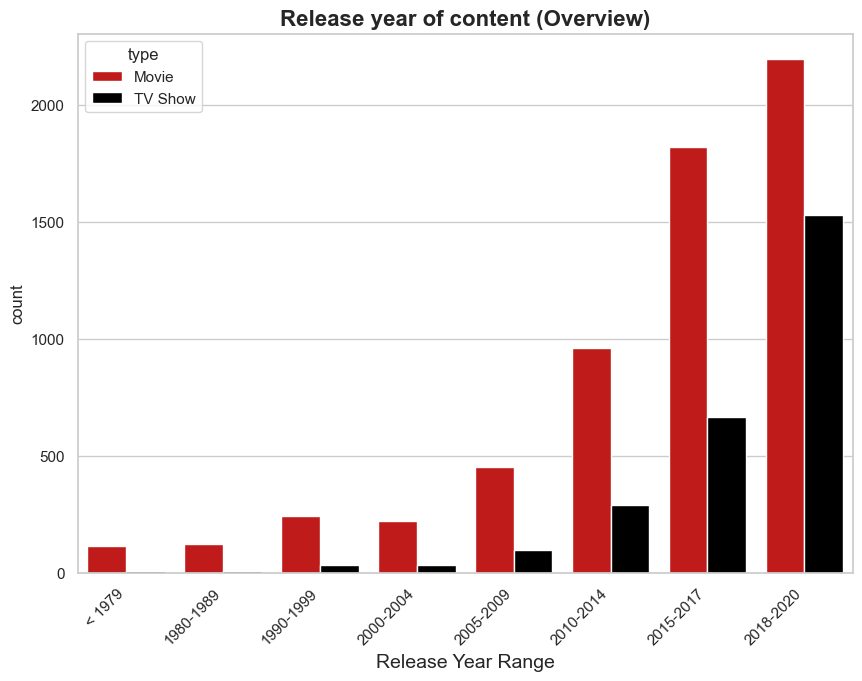

In [153]:
plt.figure(figsize=(10, 7))
# Assuming 'release_year' is a numeric column
netflix_data_cleaned = netflix_data.dropna(subset=['release_year'])

# Define custom bins for release years
custom_bins = [0, 1979, 1989, 1999, 2004, 2009, 2014, 2017, 2021]  # Adjust the upper limit as needed
bin_labels = ["< 1979", "1980-1989", "1990-1999", "2000-2004", "2005-2009", "2010-2014", "2015-2017", "2018-2020"]

# Create a new 'release_year_range' column with custom bins
netflix_data_cleaned['release_year_range'] = pd.cut(netflix_data_cleaned['release_year'], bins=custom_bins, labels=bin_labels, include_lowest=True)

ax = sns.countplot(
    data=netflix_data_cleaned,
    x="release_year_range",
    hue="type",
    palette=["#db0000", "#000000"],
    order=bin_labels
)
plt.title('Release year of content (Overview)', fontsize=16, fontweight="bold")
plt.xlabel('Release Year Range', fontsize=14)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') # Rotate x-axis labels for better readability

plt.show()


This graph compares the release year of both Movies and TV Shows. Trends:

- The more obvious trend that can be extracted from here is that recently released content is more popular, which makes sense if we think about how technology has developed to create better aesthetics within this content.
- The other trend we can see is the rise in popularity in TV Shows compared to movies. the jump from ~600 titles between 2015-2017 to ~1500 titles between 2018-2020 is much larger than that of movies for the same period.

In terms of release year comparisons, this is the bigger picture, showing data of up to 50 years back, and we can still see there are older titles that are still popular within the Netflix space. The graph below will focus in on the past decade instead, to gain a better insight on which exact years these trends can be found.

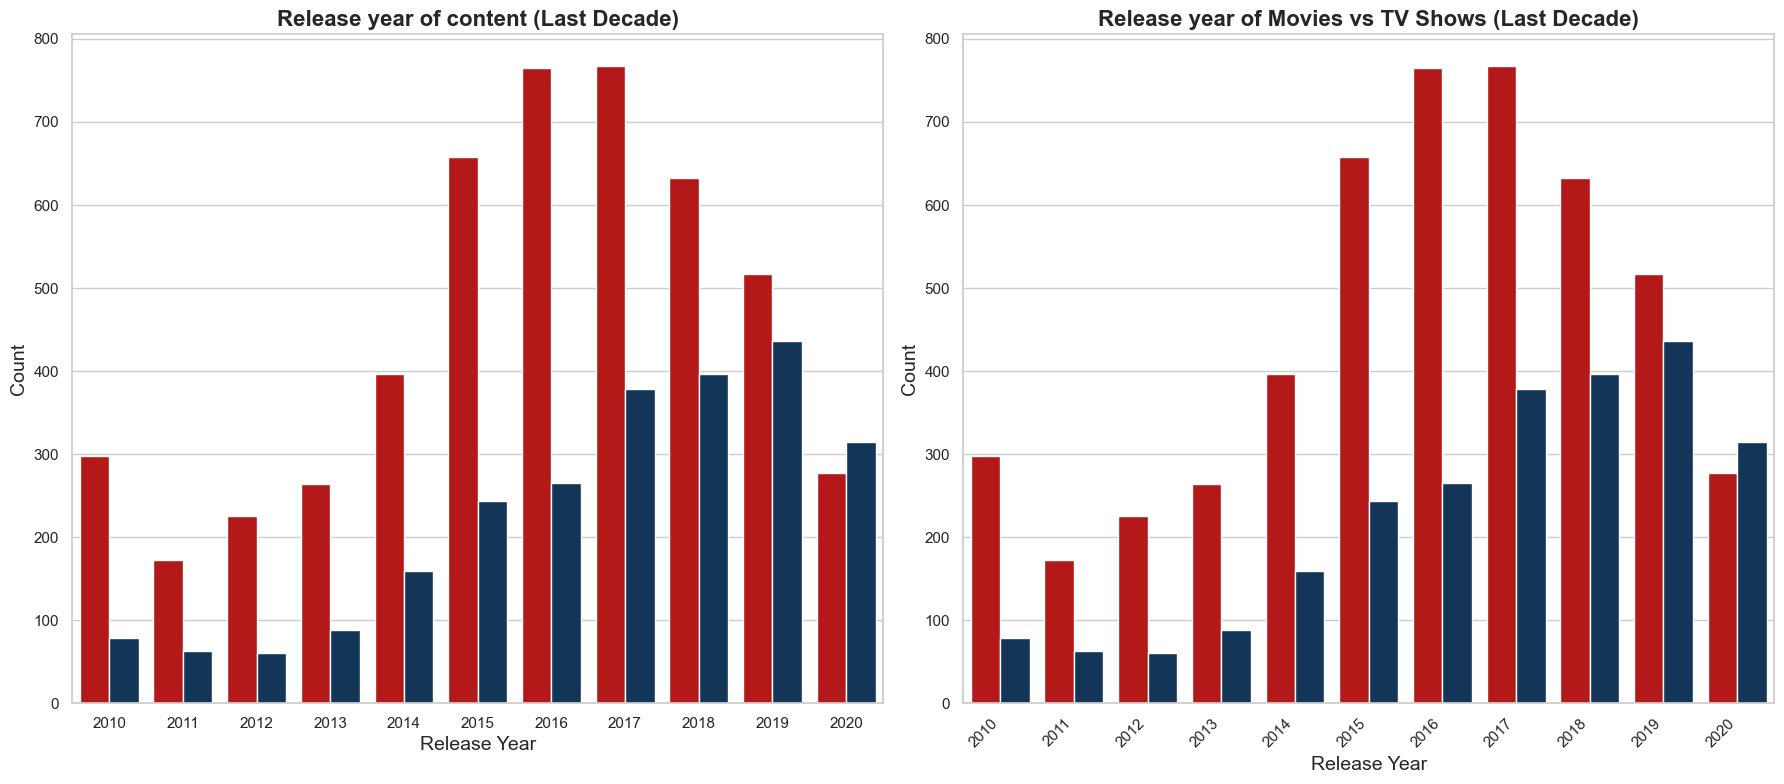

In [154]:
# Define custom bins for release years, excluding -1999
custom_bins = list(range(2010, 2022))  # Adjust the upper limit as needed
bin_labels = [str(year) for year in range(2010, 2021)]

# Create a new 'release_year_range' column with custom bins
netflix_data_cleaned['release_year_range'] = pd.cut(netflix_data_cleaned['release_year'], bins=custom_bins, labels=bin_labels, include_lowest=True)

# Create subplots with adjusted spacing
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Countplot for release years
ax1 = sns.countplot(
    data=netflix_data_cleaned,
    x = "release_year_range",
    hue = "type",
    palette = ["#cc0000","#073763"],
    order = bin_labels,
    ax = axes[0],
    legend=False
)

ax1.set_title('Release year of content (Last Decade)', fontsize=16, fontweight="bold")
ax1.set_xlabel('Release Year', fontsize=14) # x-axis title
plt.xticks(rotation=45, ha='right')
ax1.set_ylabel('Count', fontsize=14) # y-axis title

# Plot 2: Countplot for release years with hue for content type
ax2 = sns.countplot(
    data = netflix_data_cleaned,
    x = "release_year_range",
    hue = "type",
    palette = ["#cc0000","#073763"],
    order = bin_labels,
    ax = axes[1],
    legend=False
)

ax2.set_title('Release year of Movies vs TV Shows (Last Decade)', fontsize=16, fontweight="bold")
ax2.set_xlabel('Release Year', fontsize=14) # x-axis title
plt.xticks(rotation=45, ha='right')
ax2.set_ylabel('Count', fontsize=14) # y-axis title

# Adjust layout
plt.tight_layout()
plt.show()


Now that content of the last decade has been shown, we see that the first trend that was mentioned doesn't seem to be supported within this context. Looking on at the graph on the left, we can say that because of the COVID-19 pandemic, years 2019 and 2020 have seen a big drop in content output, where the which does make sense. However, it seems as though this trend had already started 2 years before (from 2017 onward). This interesting decline in content in general can potentially be explained by the graph on the right, which shows the same data, but split between movies and TV shows.<br>

In the right graph, looking at content being released between 2016-2017, there was barely an increase in movies, and almost all of the total increase comes from TV shows. In 2017, number of movies nearly doubled that of the number of TV Shows, and in just 3 years, the number of TV shows is higher that Movies in 2020. Now if we look at the trend of just TV Shows, it is in-line with the first trend mentioned previously, that most recent content is more popular, ignoring the drop due to the pandemic. All of this supports the second point, that TV Shows are slowly becoming more popular than movies within the Netflix space.<br>

Because the data is on Netflix, meaning not all possible content is available on the platform, we cannot conclude anything about the entertainment industry in general just yet. The next graph will look at content Netflix has released over the years to draw more conclusions towards the entertainment industry as a whole.

### 3.3 Year of Content Added on Netflix

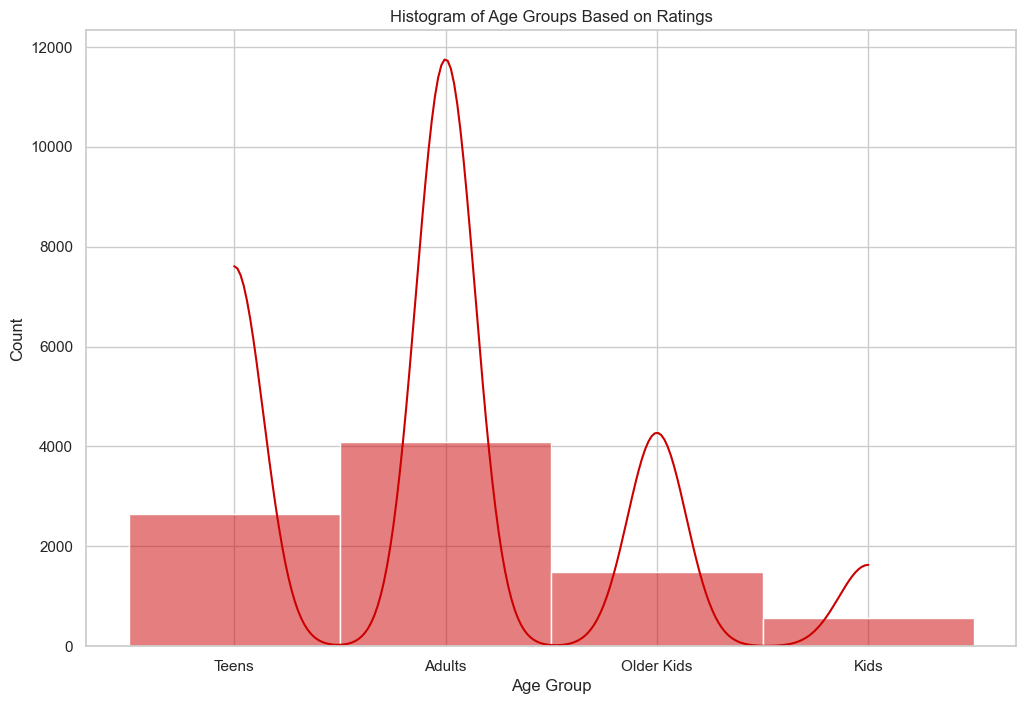

In [155]:
plt.figure(figsize=(12, 8))

sns.set(style='whitegrid') # Set Seaborn style
colors = ["#cc0000"] # Define a custom color palette

# Create the histogram
sns.histplot(data=netflix_data, x='ages', discrete=True, color=colors[0], binwidth=0, kde=True)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Histogram of Age Groups Based on Ratings')

# Show the plot
plt.show()


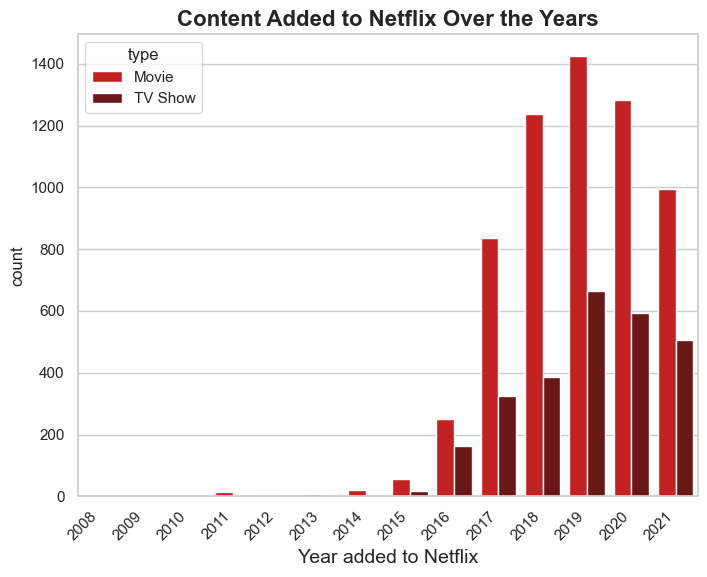

In [156]:
plt.figure(figsize=(8, 6))

netflix_data = netflix_data.dropna(subset=['year_added']) # drop N/A values that show as a column (with no values) in visual
netflix_data['year_added'] = netflix_data['year_added'].astype(int) # year_added changed to int from float

# create bar chart
ax = sns.countplot(
    data = netflix_data,
    x = "year_added",
    hue = "type", # show type (Movie, TV Show)
    palette = {'Movie': '#df0707', 'TV Show': '#780909'},
    order = netflix_data["year_added"].sort_values().unique()  # Sort in ascending order (left to right)
)

plt.title('Content Added to Netflix Over the Years', fontsize=16, fontweight="bold")
plt.xlabel('Year added to Netflix', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

This graph shows trends in how many titles Netflix adds each year. Trends:

- Netflix consistently adds more Movies than TV shows every year
- Total Content being added each year has fallen since 2019 (Movies had more of a decrease than TV shows)

Since the data seems consistent, in that trends in both Movies and TV shows have followed each other, we can conclude that the analysis of release year graphs do show trends within the entertainment industry as a whole.

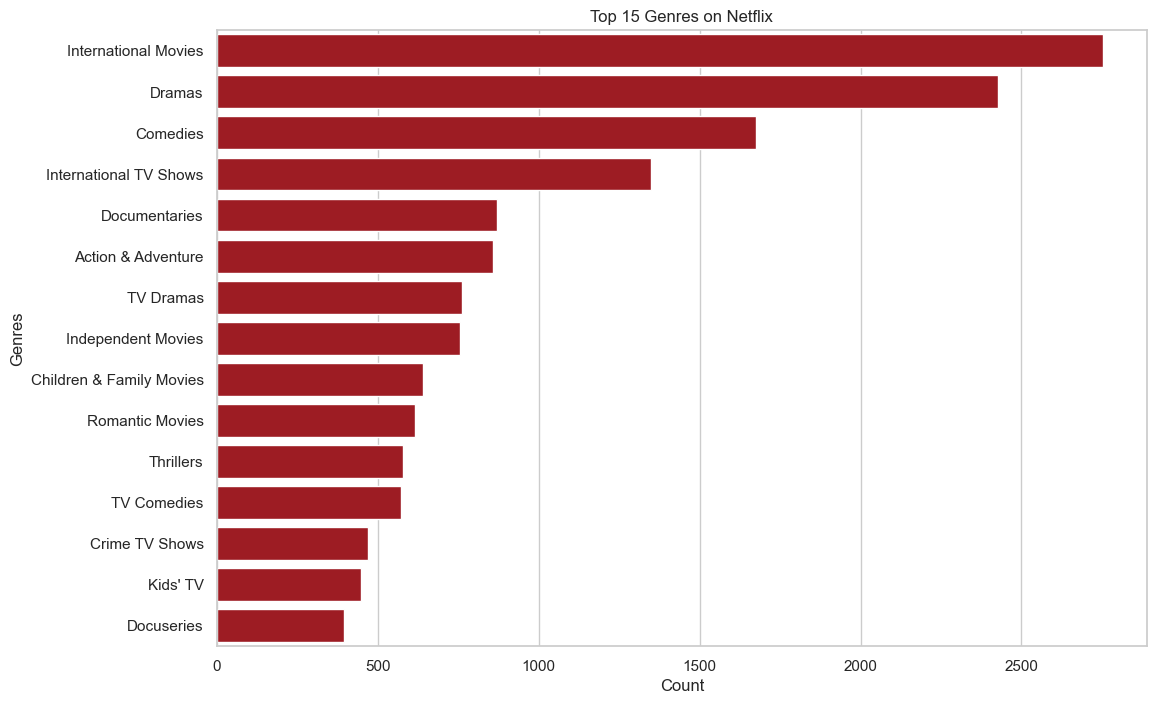

In [157]:
genres_count = netflix_data['listed_in'].str.split(', ').explode().value_counts() # Extract and count unique genres
top_genres = genres_count.head(15) # Select top 15 genres
netflix_palette = ['#b20710']

#plotting the top 15 genres
plt.figure(figsize=(12, 8))
sns.barplot(y=top_genres.index, x=top_genres.values, color=netflix_palette[0])
#label of the graph
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Top 15 Genres on Netflix')
plt.show()

# 4. Prepare the data for Machine Learning Algorithms

In [158]:
columns_to_drop = ['show_id', 'title', 'director', 'cast', 'date_added']
# Drop the specified columns
netflix_data.drop(columns=columns_to_drop, inplace=True)
netflix_data.info() #check the info

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8790 non-null   object 
 1   country       8790 non-null   object 
 2   release_year  8790 non-null   int64  
 3   rating        8790 non-null   object 
 4   duration      8790 non-null   object 
 5   listed_in     8790 non-null   object 
 6   description   8790 non-null   object 
 7   month_added   8790 non-null   float64
 8   year_added    8790 non-null   int32  
 9   month_name    8790 non-null   object 
 10  ages          8790 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 789.7+ KB


In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
selected_columns = ['listed_in', 'rating', 'release_year', 'month_added']
data_subset = netflix_data[selected_columns].copy()

# Convert categorical variables to numerical format using Label Encoding
label_encoder = LabelEncoder()
data_subset['rating'] = label_encoder.fit_transform(data_subset['rating'])
data_subset['listed_in'] = label_encoder.fit_transform(data_subset['listed_in'])

# Splitted the data into features (X) and target variable (y)
X = data_subset
y = netflix_data['type']

#Split the dataset into a training dataset (80%) and testing dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
data_subset.head()

(7032, 4) (7032,) (1758, 4) (1758,)


,listed_in,rating,release_year,month_added
0,273,4,2020,9.0
1,413,8,2021,9.0
2,241,8,2021,9.0
3,296,8,2021,9.0
4,392,8,2021,9.0


Release Year: This numerical feature might have some correlation with the type of content.

Rating: The content rating is a categorical feature, and it can provide valuable information about the type of content.

Listed_in: The genre of the content influence's whether the content is a movie or a TV show.

Month Added: These could capture patterns related to when content is added

When considering the feature "Duration," which represents the length of content in minutes, it appeared to be a self-sufficient and impactful predictor for distinguishing between movies and TV shows. To explore additional features that could contribute significantly to accuracy, we identified "Listed_in" and "rating" as another prominent features capable of making accurate predictions.

# 5. Select a model and train it

### Algorithm 1 : Linear Regression

In [160]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)

LogisticRegression()

In [161]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model_lg.predict(X_test)
# Display classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Movie       0.77      0.94      0.84      1227
     TV Show       0.70      0.35      0.47       531

    accuracy                           0.76      1758
   macro avg       0.74      0.64      0.66      1758
weighted avg       0.75      0.76      0.73      1758

0.7588168373151308


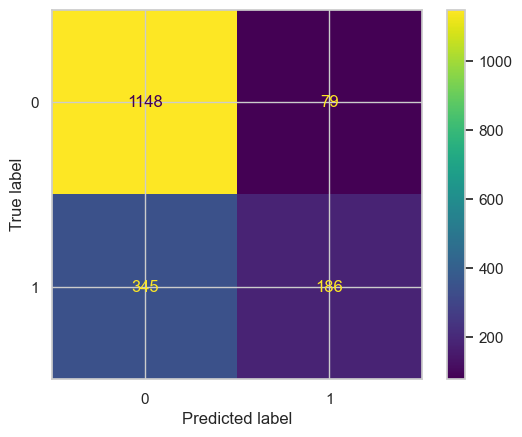

In [162]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot() # Display the Confusion Matrix

Logistic Regression is often used for tasks involving classification. In the case of predicting content types, such as whether its a Movie or a TV Show the task can be simplified to two classes. Logistic Regression is particularly suitable, for these scenarios as it models the probability of an instance belonging to a class and makes predictions based on a decision boundary. Moreover Logistic Regression is known for its simplicity, interpretability and computational efficiency making it an ideal option, for experimentation and creating baseline models.



### Algorithm 2 : SVM Model


In [163]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', C=0.1, gamma=1)
model_svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [164]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = model_svm.predict(X_test)
# Display classification report
print(classification_report(y_test, y_pred, zero_division=1))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

       Movie       0.78      0.93      0.85      1227
     TV Show       0.71      0.39      0.51       531

    accuracy                           0.77      1758
   macro avg       0.75      0.66      0.68      1758
weighted avg       0.76      0.77      0.75      1758

0.7690557451649602


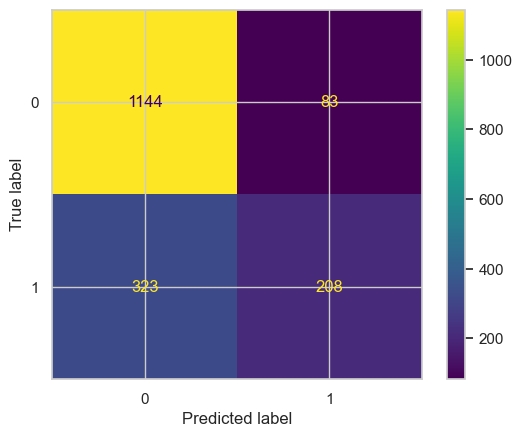

In [165]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()  # Display the Confusion Matrix

The choice of using Support Vector Machines (SVM) for the task of predicting content types (Movie or TV Show) is influenced by SVM's capability to handle binary classification tasks effectively. SVM aims to find a hyperplane that best separates the data points of different classes, making it suitable for scenarios where the goal is to distinguish between two categories.

In this case, using the linear kernel (kernel='linear') and setting hyperparameters like C and gamma, we applied an SVM model. However, the achieved accuracy of 77% may suggest that the data's inherent complexity or the chosen features might not be perfectly separable using a linear SVM.

We tried to use (kernel='poly') but it took really long time and then it didnt excute which is why we choosed linear and for the value of C = 0.1 is the which is neither underfit or overfit.

### Algorithm 3 : Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [167]:
from sklearn.metrics import classification_report, accuracy_score
rf_predictions = rf_classifier.predict(X_test)
# Display classification report
print(classification_report(y_test, rf_predictions))
print(accuracy_score(y_test, rf_predictions))

              precision    recall  f1-score   support

       Movie       0.99      1.00      1.00      1227
     TV Show       1.00      0.98      0.99       531

    accuracy                           0.99      1758
   macro avg       1.00      0.99      0.99      1758
weighted avg       0.99      0.99      0.99      1758

0.9948805460750854


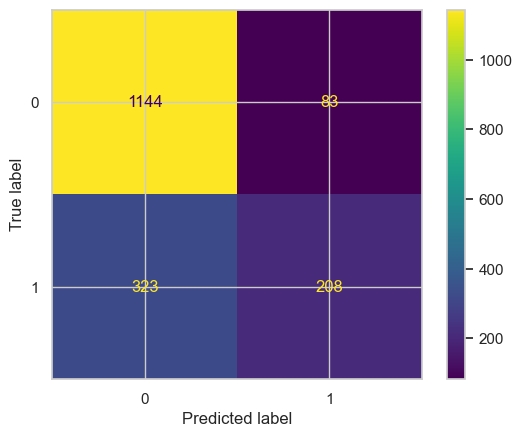

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()  # Display the Confusion Matrix

Random Forest was employed for the task of predicting content types (Movie or TV Show) due to its ability to handle complex relationships within the data and improve generalization. By constructing an ensemble of decision trees and aggregating their predictions, Random Forest reduces the risk of overfitting compared to a single decision tree. This is crucial for achieving robust performance on unseen data. Additionally, Random Forest provides insights into feature importance, allowing us to understand which attributes contribute significantly to the classification task. The algorithm's capacity to handle categorical data, maintain interpretability, and produce reliable predictions makes it well-suited for the classification of content types in the context of this dataset.

### Conclusion: Best-Performing Algorithm: Random Forest classifier

In [169]:
# Graph 1 and small description

In [170]:
# Graph 2 and small description

In [171]:
# Graph 3 and small description

In conclusion, the Random Forest classifier emerged as the best-performing algorithm for predicting content types (Movie or TV Show) in the Netflix dataset. With an accuracy of approximately 99%, it demonstrated robust performance, effectively handling the complexity of the dataset and minimizing the risk of overfitting through its ensemble of decision trees. The precision, recall, and F1-score metrics further underscore the classifier's ability to make accurate predictions for both Movie and TV Show categories. The interpretability of Random Forest, coupled with its feature importance analysis, enhances our understanding of the key attributes influencing content classification. Overall, Random Forest proves to be a reliable and effective choice for this particular classification task.